Please ensure you have the following files:
1. Content image: content.png
2. Style image: style.png

If either file is missing, please provide them before running the script.


/Users/rutulbhosale/tfenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


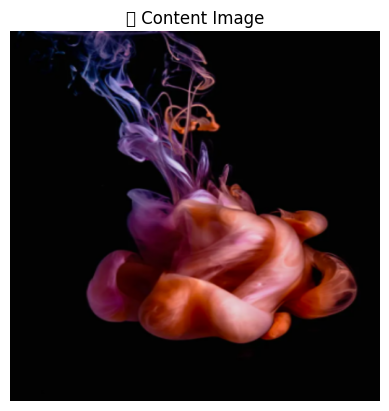

/Users/rutulbhosale/tfenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


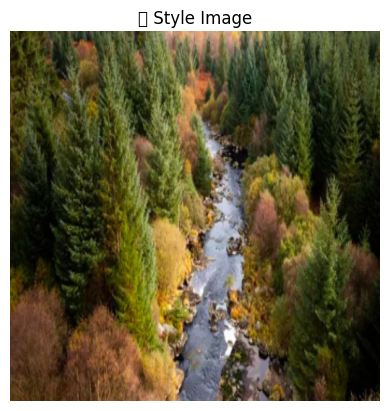

/Users/rutulbhosale/tfenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


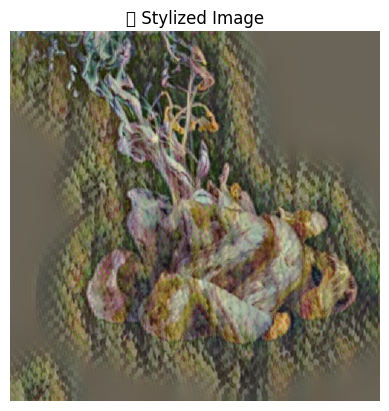

In [4]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import PIL.Image
import numpy as np
import os

# Load images
def load_image(path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"Image file '{path}' not found. Please ensure the file exists.")
    img = tf.io.read_file(path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, (512, 512))
    return img[tf.newaxis, :]

# Display image
def show(img, title=''):
    img = np.squeeze(img, axis=0)
    plt.imshow(img)
    plt.axis('off')
    plt.title(title)
    plt.show()

# Load pre-trained model from TensorFlow Hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# Provide paths to content and style images
content_path = 'content.png'  # Using existing image as content
style_path = 'style.png'

print("Please ensure you have the following files:")
print(f"1. Content image: {content_path}")
print(f"2. Style image: {style_path}")
print("\nIf either file is missing, please provide them before running the script.")

try:
    content_image = load_image(content_path)
    style_image = load_image(style_path)

    # Run style transfer
    stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]

    # Display results
    show(content_image, '🎯 Content Image')
    show(style_image, '🎨 Style Image')
    show(stylized_image, '🖼️ Stylized Image')

except FileNotFoundError as e:
    print("\nError:", str(e))
    print("\nTo fix this:")
    print("1. Make sure both image files exist in the correct locations")
    print("2. Update the paths in the script if your images are in different locations")
